# Artificial Intelligence Course, Dr.Fadaei

# Computer Assignment #2

## AI Hands-on: Game

## Parnian fazel (810198516)

### Goal:

In this assignment we get familiar with the concept of **Adversarial Search**, **Game theory** and how to work with **multiagent environments**. In this assignment we should implement minimax algorithm and get deeper in the concept of advesarial search.

### Brief Description:

In this project we are provided with the prepared implementation of checkers game and we should implement some missing parts of the code which are marked with *#Your Code Goes Here* comment. These methods which are missing are mainly related to the minimax algorithm.

In [2]:
import pygame

WIDTH, HEIGHT = 600, 600
ROWS, COLS = 8, 8
SQUARE_SIZE = WIDTH//COLS

RED = (255, 0, 0)
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
BLUE = (0, 0, 255)
GREY = (128, 128, 128)

CROWN = pygame.transform.scale(pygame.image.load('crown.png'), (44, 25))

In [3]:
import pygame

class Piece:

	PADDING = 15
	OUTLINE = 2

	def __init__(self, row, col, color):
		self.row = row
		self.col = col
		self.color = color
		self.king = False
		self.x = 0
		self.y = 0
		self.calPos()

	def calPos(self):
		self.x = SQUARE_SIZE * self.col + SQUARE_SIZE // 2
		self.y = SQUARE_SIZE * self.row + SQUARE_SIZE // 2

	def makeKing(self):
		self.king = True

	def draw(self, win):
		radius = SQUARE_SIZE//2 -self.PADDING
		pygame.draw.circle(win, self.color, (self.x, self.y), radius + self.OUTLINE)
		pygame.draw.circle(win, self.color, (self.x, self.y), radius)
		if self.king:
			win.blit(CROWN, (self.x - CROWN.get_width()//2, self.y - CROWN.get_height()//2))

	def move(self, row, col):
		self.row = row
		self.col = col
		self.calPos()

	def __repr__(self):
		return str(self.color)

In this part I implemented the `getValidMoves` method using `_traverseLeft` and `_traverseLeft method`. This method return all the valid moves for the given piece in the board. Note that for the king pieces all four directions should be checked.

In [4]:
import pygame

class Board:
    	
    def __init__(self):
        self.board = []
        self.redLeft = self.whiteLeft = 12
        self.redKings = self.whiteKings = 0
        self.createBoard()
    
    def drawSquares(self, win):
        win.fill(BLACK)
        for row in range(ROWS):
            for col in range(row % 2, COLS, 2):
                pygame.draw.rect(win, RED, (row*SQUARE_SIZE, col *SQUARE_SIZE, SQUARE_SIZE, SQUARE_SIZE))

    def evaluate(self):
        return self.whiteLeft - self.redLeft + (self.whiteKings * 0.5 - self.redKings * 0.5)

    def getAllPieces(self, color):
        pieces = []
        for row in self.board:
            for piece in row:
                if piece != 0 and piece.color == color:
                    pieces.append(piece)
        return pieces

    def move(self, piece, row, col):
        self.board[piece.row][piece.col], self.board[row][col] = self.board[row][col], self.board[piece.row][piece.col]
        piece.move(row, col)

        if row == ROWS - 1 or row == 0:
            piece.makeKing()
            if piece.color == WHITE:
                self.whiteKings += 1
            else:
                self.redKings += 1 

    def getPiece(self, row, col):
        return self.board[row][col]

    def createBoard(self):
        for row in range(ROWS):
            self.board.append([])
            for col in range(COLS):
                if col % 2 == ((row +  1) % 2):
                    if row < 3:
                        self.board[row].append(Piece(row, col, WHITE))
                    elif row > 4:
                        self.board[row].append(Piece(row, col, RED))
                    else:
                        self.board[row].append(0)
                else:
                    self.board[row].append(0)
        
    def draw(self, win):
        self.drawSquares(win)
        for row in range(ROWS):
            for col in range(COLS):
                piece = self.board[row][col]
                if piece != 0:
                    piece.draw(win)

    def remove(self, pieces):
        for piece in pieces:
            self.board[piece.row][piece.col] = 0
            if piece != 0:
                if piece.color == RED:
                    self.redLeft -= 1
                else:
                    self.whiteLeft -= 1
    
    def winner(self):
        if self.redLeft <= 0:
            return WHITE
        elif self.whiteLeft <= 0:
            return RED
        
        return None 
    
    def getValidMoves(self, piece):
        # Your Code Goes Here
        validMoves = {}
        if not piece.king:
            if piece.color == RED:
                validMoves.update(self._traverseLeft(piece.row-1, max(-1, piece.row - 3), -1, RED, piece.col-1))
                validMoves.update(self._traverseRight(piece.row-1, max(-1, piece.row - 3), -1, RED, piece.col+1))
            elif piece.color == WHITE:
                validMoves.update(self._traverseLeft(piece.row+1, min(8, piece.row + 3), +1, WHITE, piece.col-1))
                validMoves.update(self._traverseRight(piece.row+1, min(8, piece.row + 3), +1, WHITE, piece.col+1))
        elif piece.king:
            validMoves.update(self._traverseLeft(piece.row+1, min(8, piece.row + 3), +1, piece.color, piece.col-1))
            validMoves.update(self._traverseRight(piece.row+1, min(8, piece.row + 3), +1, piece.color, piece.col+1))
            validMoves.update(self._traverseLeft(piece.row-1, max(-1, piece.row - 3), -1, piece.color, piece.col-1))
            validMoves.update(self._traverseRight(piece.row-1, max(-1, piece.row - 3), -1, piece.color, piece.col+1))
            
        return validMoves

    def _traverseLeft(self, start, stop, step, color, left, skipped=[]):
        moves = {}
        last = []
        for r in range(start, stop, step):
            if left < 0:
                break
            
            current = self.board[r][left]
            if current == 0:
                if skipped and not last:
                    break
                elif skipped:
                    moves[(r, left)] = last + skipped
                else:
                    moves[(r, left)] = last
                
                if last:
                    if step == -1:
                        row = max(r-3, 0)
                    else:
                        row = min(r+3, ROWS)
                    moves.update(self._traverseLeft(r+step, row, step, color, left-1,skipped=last))
                    moves.update(self._traverseRight(r+step, row, step, color, left+1,skipped=last))
                break
            elif current.color == color:
                break
            else:
                last = [current]

            left -= 1
        
        return moves

    def _traverseRight(self, start, stop, step, color, right, skipped=[]):
        moves = {}
        last = []
        for r in range(start, stop, step):
            if right >= COLS:
                break
            
            current = self.board[r][right]
            if current == 0:
                if skipped and not last:
                    break
                elif skipped:
                    moves[(r,right)] = last + skipped
                else:
                    moves[(r, right)] = last
                
                if last:
                    if step == -1:
                        row = max(r-3, 0)
                    else:
                        row = min(r+3, ROWS)
                    moves.update(self._traverseLeft(r+step, row, step, color, right-1,skipped=last))
                    moves.update(self._traverseRight(r+step, row, step, color, right+1,skipped=last))
                break
            elif current.color == color:
                break
            else:
                last = [current]

            right += 1
        
        return moves

In [5]:
import pygame

class Game:

    def __init__(self, win):
        self._init()
        self.win = win

    def update(self):
        self.board.draw(self.win)
        pygame.display.update()

    def _init(self):
        self.selected = None
        self.board = Board()
        self.turn = RED
        self.validMoves = {}

    def winner(self):
        return self.board.winner()

    def _move(self, row, col):
        piece = self.board.getPiece(row, col)
        if self.selected and piece == 0 and (row, col) in self.validMoves:
            self.board.move(self.selected, row, col)
            skipped = self.validMoves[(row, col)]
            if skipped:
                self.board.remove(skipped)
            self.changeTurn()
        else:
            return False
        return True

    def changeTurn(self):
        self.validMoves = {}
        if self.turn == RED:
            self.turn = WHITE
        else:
            self.turn = RED

    def getBoard(self):
        return self.board

    def aiMove(self, board):
        self.board = board
        self.changeTurn()

Here is the main part of the minimax algorithm.
According to the *Artifical Inteligence A Modern Approach* the definition of minimax algorithm is as follows:
The minimax algolorithm computes the minimax desicion from the current state.
First we should implement the `getAllMoves` method to get all the valid moves for a posiotion(board). Note that here all board are like a node of the minimax desicion tree. Therefore in this method all the childs of a node are made. In this method we should get copy of the parent node in order to avoid any changes in that node. Also, we should write the `simulateMove` function. In this function after choosing a valid move we simulate that move in the parent node and make a nre child node(board) and finally add this node to the tree. Now the `minimax` function can be implemented. The minimax function uses a recursive computation of the minimax values of each successor state. The recursion proceed all the way down to the leavesof the tree, and then the minimax values are backed up through the tree as the recursion unwinds. In this function I checked the conditions for the `White player` and the `Red Player` seperatly. In each level of the recursive function I checked whether the evaluated value less or more than the last value of the parent node assigned the `bestMove` respectively. Here the max player is white so we are trying to get the maximum value for the white player and the red player is the oponant and in the minimax algorithm the minimum value is considered.

**Analysis of Minimax:**
* A complete depth-first search? Yes
* Time complexity? O(bm)
* Space complexity? O(bm) (depth-first exploration)

In [6]:
from copy import deepcopy
import pygame
import numpy as np

RED = (255,0,0)
WHITE = (255,255,255)

def minimax(position, depth, maxPlayer):
    # Your Code Goes Here
    if position.winner() or depth == 0:
        return position.evaluate(), position
    if maxPlayer:
        v = -np.inf
        bestMove = 0
        allMoves = getAllMoves(position, WHITE)
        for move in allMoves:
            evaluation, currentMove = minimax(move, depth-1, False)
            if v <= evaluation:
                v = evaluation
                bestMove = move
        return v, bestMove


    if not maxPlayer:
        v = np.inf
        bestMove = 0
        allMoves = getAllMoves(position, RED)
        for move in allMoves:
            evaluation, currentMove = minimax(move, depth-1, True)
            if v >= evaluation:
                v = evaluation
                bestMove = move
        return v, bestMove

    
def simulateMove(piece, dst, board, skip):
    # Your Code Goes Here
    childNode = deepcopy(board)
    if len(skip):
        childNode.remove(skip)
    piecee = childNode.board[piece.row][piece.col]
    childNode.move(piecee, dst[0], dst[1])
    return childNode

def getAllMoves(board, color):
    # Your Code Goes Here
    allMoves = []
    for _, piece in np.ndenumerate(board.board):
        if not piece == 0 and piece.color == color:
            pieceMoves = board.getValidMoves(piece)
            for dst, passedPieces in pieceMoves.items():
                childNode = simulateMove(piece, dst, board, passedPieces)
                allMoves.append(childNode)
    return allMoves

In [ ]:
import pygame

FPS = 60

WHITE_DEPTH = 5
RED_DEPTH = 5

WIN = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption('Checkers')

def getRowColFromMouse(pos):
    x, y = pos
    row = y // SQUARE_SIZE
    col = x // SQUARE_SIZE
    return row, col

if __name__ == '__main__':
    run = True
    clock = pygame.time.Clock()
    game = Game(WIN)

    while run:
        clock.tick(FPS)

        if game.turn == WHITE:
            value, newBoard = minimax(game.getBoard(), WHITE_DEPTH, True)
            game.aiMove(newBoard)

        if game.winner() != None:
            print(game.winner())
            run = False

        if game.turn == RED:
            value, newBoard = minimax(game.getBoard(), RED_DEPTH, False)
            game.aiMove(newBoard)

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                run = False

        game.update()
    
    pygame.quit()

**Part 3:** The heuristic evaluation function is estimated desirability or utility of a position. Acoording to the book, an evaluation function returns an estimate of the expected utility of the game from a given position(like heusrixtic function).
Here the evaluation function is defined in the Board class.

**part 4:** By setting the both `WHITE_DEPTH` and `RED_DEPTH` to 1, the execuation time is 1.01s and then we get in to a local minima. Given that the depths are the same for both players we expect the white player which started the game first, wins the game and also because the depths are small the movements in each state are not very smart!
Here is the picture:
Note that here the two king pieces are stuck and we got into a local minima.

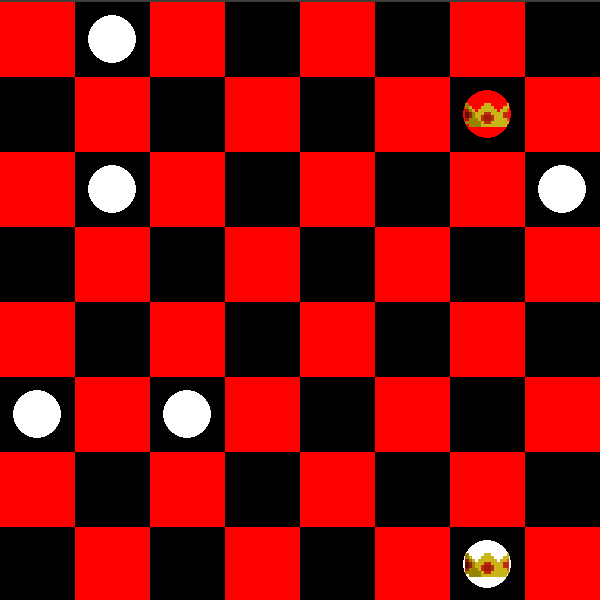

**part 5:** By setting the `WHITE_DEPTH` to 5 and `RED_DEPTH` to 2, the execuation time is around 2 minutes and then we get into a local minima. Here is the picture of it:

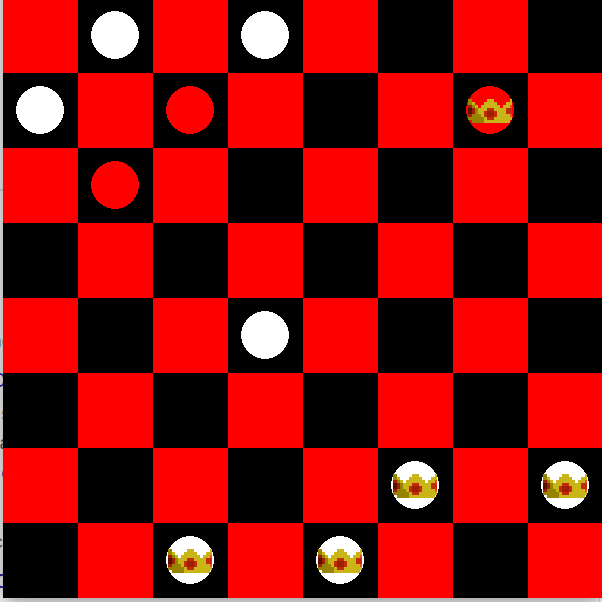

By setting the `WHITE_DEPTH` to 2 and `RED_DEPTH` to 5, the execuation time is around 2 minuts and then we get into a local minima.
Here is the picture of it:

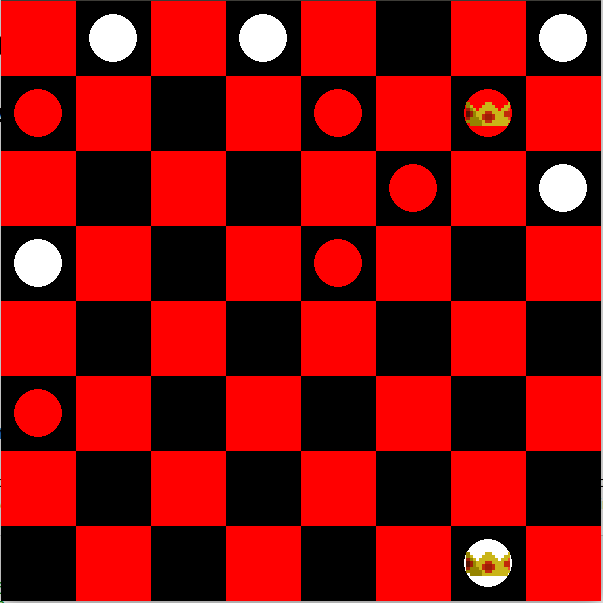

The game stuck in local minima but the white player was more likely to win beacuase he started first. Also, in the process of the game the decisions of both players were better than depth 1 and they were smarter but the executation time increased and it takes about 3 minutes to get to this posione shown above.

As we can see by increasing the depth of the piece they play better. 

**part 6:** By setting both `WHITE_DEPTH` and `RED_DEPTH` to 5, the execuation time is around 4 minuts and then we get into a local minima. Here is the picture of it:

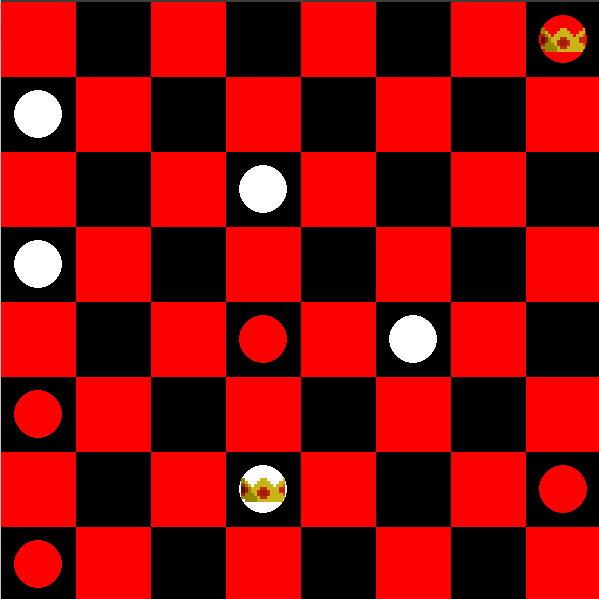

The game stuck in local minima but the white player was more likely to win beacuase he started first. Also, in the process of the game the decisions of both players were better than depth 1 and they were smarter

**Comparing:** As we can see by increasing the depth of the search the executation time increases drastically. But, by increasing the depth of the search each player can see further situations (more depth in the tree) so the selected move will be better and therefore the player which has more depth can make better desicions so the chance of winning get more by increasing the depth. When the serach depth of both players are equal the player which start the game first is more likely to win.

**Concolusion:** In this project I learned the basic concepts of `Games`, `Adversarial search` and `Minimax Algorithhm`. I realized that The performance of a game-playing program is dependent on several factors such as the evaluation function and the depth of the search. Now I can use minimax algorithm and define the important factors based on the goal of the question.